**DS_C3_SC1 - PLATAFORMAS DE VISUALIZACIÓN**

---

**Reto: Explorando el índice de felicidad**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


NOMBRE DEL PARTICIPANTE: ------------------------------( **GUTENBERG BLANCO LORENTI** )------------------------------

1.	Genera una libreta en Google Colab para el reto, cuya estructura esté basada en los análisis solicitados.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

2.	Descarga el archivo: happiness_report.csv y guarda, en un dataframe (`happiness`), todos sus registros.

In [3]:
happiness = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/happiness_report.csv')
happiness

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


3.	A partir del dataframe happiness obtén otro (`mexico`) donde sólo almacenes la información de México. Haz que la columna `Country or region` quede como índice. 

In [4]:
mexico = happiness[happiness['Country or region'] == 'Mexico']
mexico.set_index('Country or region', inplace = True)
mexico

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Country or region,,,,,,,,
Mexico,23,6.595,1.07,1.323,0.861,0.433,0.074,0.073


4.	Obtén un histograma del puntaje (`score`) para identificar el rango o clase más frecuente. Ubica el valor de México con una etiqueta de texto. 

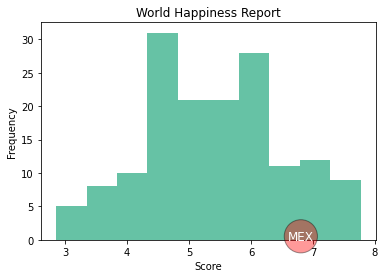

In [5]:
sns.set_palette('Set2')
happiness['Score'].plot.hist(title = 'World Happiness Report')
plt.xlabel('Score')
plt.text(mexico['Score'].values, 0, 'MEX', fontsize = 12, color = 'white', bbox = {'boxstyle' : 'circle', 'facecolor' : 'red', 'alpha' : 0.4})
plt.show()

5.	Construye un box plot para la columna esperanza de vida (`Healthy life expectancy`). Ubica el valor de México con una anotación.

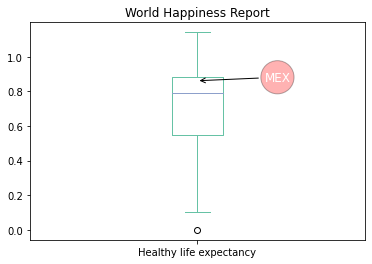

In [6]:
happiness['Healthy life expectancy'].plot.box()
plt.title('World Happiness Report')

plt.annotate('MEX', fontsize = 12, color = 'white', xy = (1, mexico['Healthy life expectancy'].to_list()[0]), xytext = (1.2, mexico['Healthy life expectancy'].to_list()[0]), 
             arrowprops = dict(arrowstyle = '->', color = 'black'), bbox = dict(boxstyle = 'circle', facecolor = 'red', alpha = 0.3))
plt.show()

6.	Crea una gráfico circular para analizar en qué medida los factores contribuyen a evaluar la felicidad en México. Para ello, deberás modificar la estructura del dataframe `mexico` obtenido anteriormente.

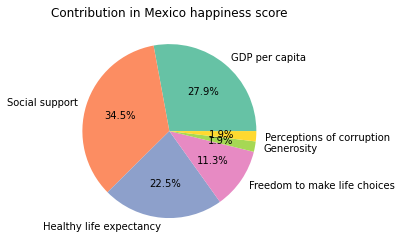

In [7]:
mexico = mexico.drop(['Overall rank', 'Score'], axis = 1)
mexico.index.name = ''
mexico = mexico.T
mexico.columns = ['Factors']

plt.pie('Factors', labels = mexico.index, data = mexico, autopct = '%1.1f%%')
plt.title('Contribution in Mexico happiness score')
plt.ylabel('')
plt.show()

7.	Filtra el dataframe para quedarte con 5 países (el más feliz, el menos feliz, México y dos más de tu interés) y visualiza en una misma gráfica los 6 factores.

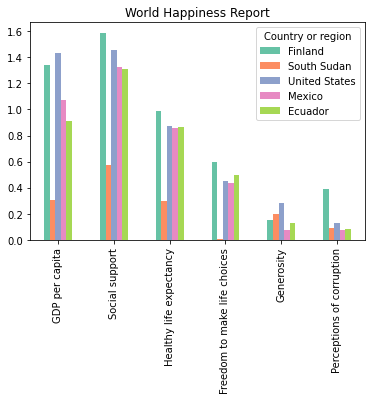

In [8]:
topFive = pd.concat([happiness[happiness['Score'] == happiness['Score'].max()], happiness[happiness['Score'] == happiness['Score'].min()], 
                     happiness[happiness['Country or region'].isin(['Mexico', 'Ecuador', 'United States'])]], ignore_index = True)
topFive = topFive.drop(['Overall rank', 'Score'], axis = 1)
topFive.set_index('Country or region', inplace = True)
topFive = topFive.T
topFive.plot.bar()
plt.title('World Happiness Report')
plt.show()

8.	Crea una matriz de subgráficas de 2 x 3 con scatter plots del puntaje (`score`) versus los 6 factores para determinar qué factor influye más en la evaluación.

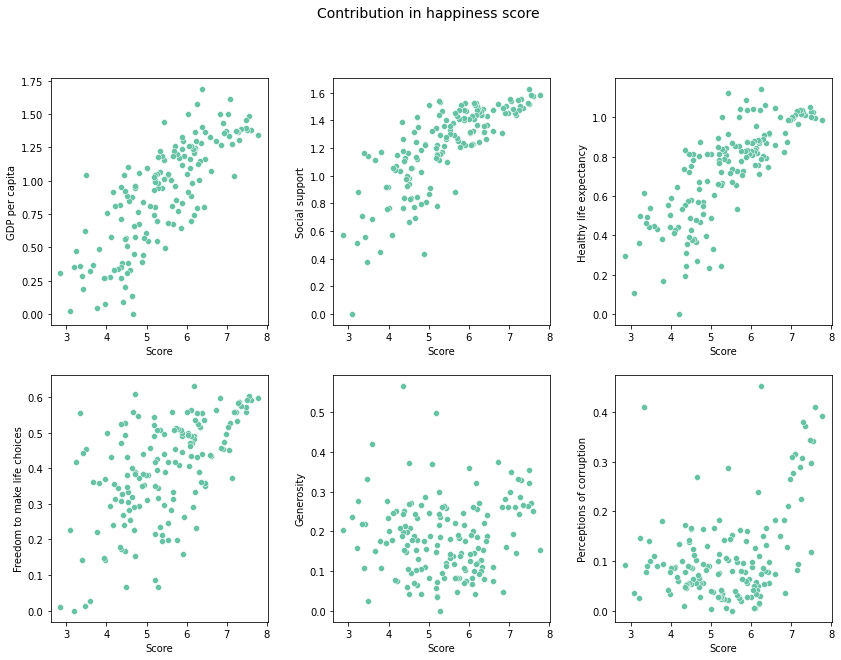

In [9]:
fig, axs = plt.subplots(2, 3, figsize = (14, 10))
plt.subplots_adjust(wspace = 0.3)
fig.suptitle('Contribution in happiness score', fontsize = 14)

sns.scatterplot(x = 'Score', y = 'GDP per capita', data = happiness, ax = axs[0, 0])
sns.scatterplot(x = 'Score', y = 'Social support', data = happiness, ax = axs[0, 1])
sns.scatterplot(x = 'Score', y = 'Healthy life expectancy', data = happiness, ax = axs[0, 2])
sns.scatterplot(x = 'Score', y = 'Freedom to make life choices', data = happiness, ax = axs[1, 0])
sns.scatterplot(x = 'Score', y = 'Generosity', data = happiness, ax = axs[1, 1])
sns.scatterplot(x = 'Score', y = 'Perceptions of corruption', data = happiness, ax = axs[1, 2])

plt.show()

9.	Comprueba lo anterior con un heatmap donde incluyas los índices de correlación.

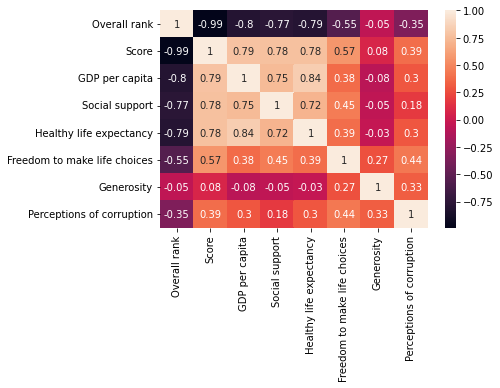

In [10]:
sns.heatmap(round(happiness.corr(), 2), annot = True)
plt.show()

10.	Combina con el dataframe `metada` (Metadata.csv) para graficar la felicidad promedio por región. 

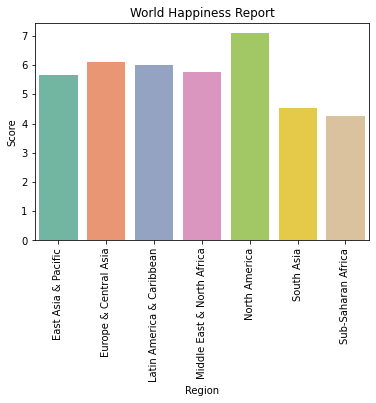

In [21]:
import numpy as np

metadata = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/Metadata.csv')
metadata = metadata.rename({'TableName' : 'Country or region'}, axis = 1)
happinessMetadata = happiness.merge(metadata, on = 'Country or region')
happinessMean = happinessMetadata[['Region', 'Score']].groupby('Region').mean()
sns.barplot(x = happinessMean.index, y = 'Score', data = happinessMean)
plt.xticks(rotation = 90)
plt.title('World Happiness Report')
plt.show()